In [12]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave, imshow

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.viewer import ImageViewer
from skimage.morphology import binary_dilation
from skimage.measure import find_contours
from scipy import ndimage as ndi

import cv2
from PIL import Image

from natsort import natsorted

from tqdm import tqdm

import matplotlib.pyplot as plt

### Image path

/home/nathan/anaconda3/envs/cellpose/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


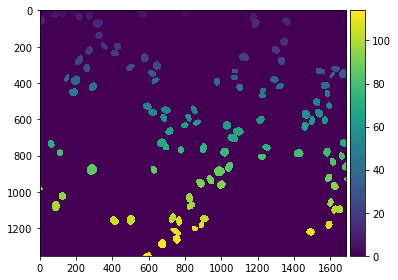

In [2]:
image_path = "/home/nathan/data/kraken/pcna/MK0000/Pos15/masks/attempt3/"
image_name = "img_channel001_position015_time000000000_z000_cp_masks.png"
image = imread(os.path.normpath(os.path.join(image_path, image_name)))
imshow(image)

# label image and erode each segment

<class 'PIL.Image.Image'>


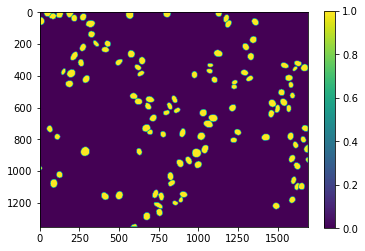

In [19]:
segmentation = image
binary_segmentation = np.zeros(segmentation.shape, dtype=bool)
labels = list(np.unique(segmentation).astype(int))
labels.remove(0)
for i in labels:
    mask = segmentation == i
    mask_eroded = ndi.binary_erosion(mask, iterations=1)
    binary_segmentation = np.logical_or(binary_segmentation, mask_eroded)

#imshow(binary_segmentation)
# plt.imshow(binary_segmentation)
# plt.colorbar()

im = Image.fromarray(binary_segmentation, mode = 'L')
im.save("/home/nathan/data/kraken/pcna/MK0000/Pos15/masks/your_file.tif")
plt.imshow(im)
plt.colorbar()
print(type(im))

# label and erode over whole stack

In [3]:
image_path = '/home/nathan/data/kraken/pcna/MK0000/Pos15/masks/attempt3'
image_list = [m for m in os.listdir(image_path) if m.endswith('.png')]
image_list = natsorted(image_list)
image_list

['img_channel001_position015_time000000000_z000_cp_masks.png',
 'img_channel001_position015_time000000001_z000_cp_masks.png',
 'img_channel001_position015_time000000002_z000_cp_masks.png',
 'img_channel001_position015_time000000003_z000_cp_masks.png',
 'img_channel001_position015_time000000004_z000_cp_masks.png',
 'img_channel001_position015_time000000005_z000_cp_masks.png',
 'img_channel001_position015_time000000006_z000_cp_masks.png',
 'img_channel001_position015_time000000007_z000_cp_masks.png',
 'img_channel001_position015_time000000008_z000_cp_masks.png',
 'img_channel001_position015_time000000009_z000_cp_masks.png',
 'img_channel001_position015_time000000010_z000_cp_masks.png',
 'img_channel001_position015_time000000011_z000_cp_masks.png',
 'img_channel001_position015_time000000012_z000_cp_masks.png',
 'img_channel001_position015_time000000013_z000_cp_masks.png',
 'img_channel001_position015_time000000014_z000_cp_masks.png',
 'img_channel001_position015_time000000015_z000_cp_mask

In [23]:
image_path = '/home/nathan/data/kraken/pcna/MK0000/Pos15/masks/attempt3'
image_list = [m for m in os.listdir(image_path) if m.endswith('.png')]
image_list = natsorted(image_list)
output_dir = os.path.join(image_path, 'binary_masks')
try:
    os.mkdir(output_dir)
except:
    print('output dir already exists')
for image_name in tqdm(image_list):
    segmentation = imread(os.path.normpath(os.path.join(image_path, image_name)))
    
    binary_segmentation = np.zeros(segmentation.shape, dtype=bool)
    labels = list(np.unique(segmentation).astype(int))
    labels.remove(0)
    for i in labels:
        mask = segmentation == i
        mask_eroded = ndi.binary_erosion(mask, iterations=1)
        binary_segmentation = np.logical_or(binary_segmentation, mask_eroded)
    im = Image.fromarray(binary_segmentation, mode = 'L')
    output_name = image_name.replace('.png', '.tif')
    output = os.path.join(output_dir, output_name)
    im.save(output)
    print(output_name, "saved")


  0%|          | 0/546 [00:00<?, ?it/s]

output dir already exists


  0%|          | 1/546 [00:02<26:01,  2.87s/it]

img_channel001_position015_time000000000_z000_cp_masks.tif saved


  0%|          | 2/546 [00:05<25:48,  2.85s/it]

img_channel001_position015_time000000001_z000_cp_masks.tif saved


  1%|          | 3/546 [00:08<25:45,  2.85s/it]

img_channel001_position015_time000000002_z000_cp_masks.tif saved


  1%|          | 4/546 [00:11<25:47,  2.85s/it]

img_channel001_position015_time000000003_z000_cp_masks.tif saved


  1%|          | 5/546 [00:14<25:25,  2.82s/it]

img_channel001_position015_time000000004_z000_cp_masks.tif saved


  1%|          | 6/546 [00:16<25:05,  2.79s/it]

img_channel001_position015_time000000005_z000_cp_masks.tif saved


  1%|▏         | 7/546 [00:19<24:54,  2.77s/it]

img_channel001_position015_time000000006_z000_cp_masks.tif saved


  1%|▏         | 8/546 [00:22<25:21,  2.83s/it]

img_channel001_position015_time000000007_z000_cp_masks.tif saved


  2%|▏         | 9/546 [00:25<25:13,  2.82s/it]

img_channel001_position015_time000000008_z000_cp_masks.tif saved
img_channel001_position015_time000000009_z000_cp_masks.tif saved


  2%|▏         | 11/546 [00:28<19:14,  2.16s/it]

img_channel001_position015_time000000010_z000_cp_masks.tif saved


  2%|▏         | 12/546 [00:31<21:16,  2.39s/it]

img_channel001_position015_time000000011_z000_cp_masks.tif saved


  2%|▏         | 13/546 [00:34<22:56,  2.58s/it]

img_channel001_position015_time000000012_z000_cp_masks.tif saved


  3%|▎         | 14/546 [00:37<23:18,  2.63s/it]

img_channel001_position015_time000000013_z000_cp_masks.tif saved


  3%|▎         | 15/546 [00:39<23:27,  2.65s/it]

img_channel001_position015_time000000014_z000_cp_masks.tif saved


  3%|▎         | 16/546 [00:42<23:41,  2.68s/it]

img_channel001_position015_time000000015_z000_cp_masks.tif saved


  3%|▎         | 17/546 [00:45<24:17,  2.75s/it]

img_channel001_position015_time000000016_z000_cp_masks.tif saved


  3%|▎         | 18/546 [00:48<24:29,  2.78s/it]

img_channel001_position015_time000000017_z000_cp_masks.tif saved


  3%|▎         | 19/546 [00:51<24:31,  2.79s/it]

img_channel001_position015_time000000018_z000_cp_masks.tif saved


  4%|▎         | 20/546 [00:54<24:32,  2.80s/it]

img_channel001_position015_time000000019_z000_cp_masks.tif saved


  4%|▍         | 21/546 [00:56<24:48,  2.83s/it]

img_channel001_position015_time000000020_z000_cp_masks.tif saved


  4%|▍         | 22/546 [00:59<24:48,  2.84s/it]

img_channel001_position015_time000000021_z000_cp_masks.tif saved


  4%|▍         | 23/546 [01:02<25:21,  2.91s/it]

img_channel001_position015_time000000022_z000_cp_masks.tif saved


  4%|▍         | 24/546 [01:05<25:24,  2.92s/it]

img_channel001_position015_time000000023_z000_cp_masks.tif saved


  5%|▍         | 25/546 [01:08<25:47,  2.97s/it]

img_channel001_position015_time000000024_z000_cp_masks.tif saved


  5%|▍         | 26/546 [01:11<25:56,  2.99s/it]

img_channel001_position015_time000000025_z000_cp_masks.tif saved


  5%|▍         | 27/546 [01:15<26:08,  3.02s/it]

img_channel001_position015_time000000026_z000_cp_masks.tif saved


  5%|▌         | 28/546 [01:18<26:09,  3.03s/it]

img_channel001_position015_time000000027_z000_cp_masks.tif saved


  5%|▌         | 29/546 [01:21<26:07,  3.03s/it]

img_channel001_position015_time000000028_z000_cp_masks.tif saved


  5%|▌         | 30/546 [01:24<26:15,  3.05s/it]

img_channel001_position015_time000000029_z000_cp_masks.tif saved


  6%|▌         | 31/546 [01:27<26:13,  3.06s/it]

img_channel001_position015_time000000030_z000_cp_masks.tif saved


  6%|▌         | 32/546 [01:30<26:13,  3.06s/it]

img_channel001_position015_time000000031_z000_cp_masks.tif saved


  6%|▌         | 33/546 [01:33<27:26,  3.21s/it]

img_channel001_position015_time000000032_z000_cp_masks.tif saved


  6%|▌         | 34/546 [01:37<27:36,  3.23s/it]

img_channel001_position015_time000000033_z000_cp_masks.tif saved


  6%|▋         | 35/546 [01:40<27:20,  3.21s/it]

img_channel001_position015_time000000034_z000_cp_masks.tif saved


  7%|▋         | 36/546 [01:43<27:21,  3.22s/it]

img_channel001_position015_time000000035_z000_cp_masks.tif saved


  7%|▋         | 37/546 [01:46<27:09,  3.20s/it]

img_channel001_position015_time000000036_z000_cp_masks.tif saved


  7%|▋         | 38/546 [01:49<26:59,  3.19s/it]

img_channel001_position015_time000000037_z000_cp_masks.tif saved


  7%|▋         | 39/546 [01:53<27:04,  3.20s/it]

img_channel001_position015_time000000038_z000_cp_masks.tif saved


  7%|▋         | 40/546 [01:56<26:45,  3.17s/it]

img_channel001_position015_time000000039_z000_cp_masks.tif saved


  8%|▊         | 41/546 [01:59<27:14,  3.24s/it]

img_channel001_position015_time000000040_z000_cp_masks.tif saved


  8%|▊         | 42/546 [02:02<26:49,  3.19s/it]

img_channel001_position015_time000000041_z000_cp_masks.tif saved


  8%|▊         | 43/546 [02:05<26:47,  3.20s/it]

img_channel001_position015_time000000042_z000_cp_masks.tif saved


  8%|▊         | 44/546 [02:09<27:05,  3.24s/it]

img_channel001_position015_time000000043_z000_cp_masks.tif saved


  8%|▊         | 45/546 [02:12<27:18,  3.27s/it]

img_channel001_position015_time000000044_z000_cp_masks.tif saved


  8%|▊         | 46/546 [02:16<27:27,  3.29s/it]

img_channel001_position015_time000000045_z000_cp_masks.tif saved


  9%|▊         | 47/546 [02:19<27:32,  3.31s/it]

img_channel001_position015_time000000046_z000_cp_masks.tif saved


  9%|▉         | 48/546 [02:22<27:21,  3.30s/it]

img_channel001_position015_time000000047_z000_cp_masks.tif saved


  9%|▉         | 49/546 [02:25<27:25,  3.31s/it]

img_channel001_position015_time000000048_z000_cp_masks.tif saved


  9%|▉         | 50/546 [02:29<27:16,  3.30s/it]

img_channel001_position015_time000000049_z000_cp_masks.tif saved


  9%|▉         | 51/546 [02:32<27:00,  3.27s/it]

img_channel001_position015_time000000050_z000_cp_masks.tif saved


 10%|▉         | 52/546 [02:35<26:54,  3.27s/it]

img_channel001_position015_time000000051_z000_cp_masks.tif saved


 10%|▉         | 53/546 [02:38<26:42,  3.25s/it]

img_channel001_position015_time000000052_z000_cp_masks.tif saved


 10%|▉         | 54/546 [02:42<26:50,  3.27s/it]

img_channel001_position015_time000000053_z000_cp_masks.tif saved


 10%|█         | 55/546 [02:45<27:02,  3.30s/it]

img_channel001_position015_time000000054_z000_cp_masks.tif saved


 10%|█         | 56/546 [02:48<26:53,  3.29s/it]

img_channel001_position015_time000000055_z000_cp_masks.tif saved


 10%|█         | 57/546 [02:52<27:02,  3.32s/it]

img_channel001_position015_time000000056_z000_cp_masks.tif saved


 11%|█         | 58/546 [02:55<26:53,  3.31s/it]

img_channel001_position015_time000000057_z000_cp_masks.tif saved


 11%|█         | 59/546 [02:58<26:44,  3.29s/it]

img_channel001_position015_time000000058_z000_cp_masks.tif saved


 11%|█         | 60/546 [03:02<26:32,  3.28s/it]

img_channel001_position015_time000000059_z000_cp_masks.tif saved


 11%|█         | 61/546 [03:05<26:42,  3.30s/it]

img_channel001_position015_time000000060_z000_cp_masks.tif saved


 11%|█▏        | 62/546 [03:08<26:39,  3.31s/it]

img_channel001_position015_time000000061_z000_cp_masks.tif saved


 12%|█▏        | 63/546 [03:12<26:43,  3.32s/it]

img_channel001_position015_time000000062_z000_cp_masks.tif saved


 12%|█▏        | 64/546 [03:15<26:42,  3.33s/it]

img_channel001_position015_time000000063_z000_cp_masks.tif saved


 12%|█▏        | 65/546 [03:18<26:38,  3.32s/it]

img_channel001_position015_time000000064_z000_cp_masks.tif saved


 12%|█▏        | 66/546 [03:22<26:48,  3.35s/it]

img_channel001_position015_time000000065_z000_cp_masks.tif saved


 12%|█▏        | 67/546 [03:25<27:00,  3.38s/it]

img_channel001_position015_time000000066_z000_cp_masks.tif saved


 12%|█▏        | 68/546 [03:29<27:10,  3.41s/it]

img_channel001_position015_time000000067_z000_cp_masks.tif saved


 13%|█▎        | 69/546 [03:32<27:13,  3.42s/it]

img_channel001_position015_time000000068_z000_cp_masks.tif saved


 13%|█▎        | 70/546 [03:36<27:55,  3.52s/it]

img_channel001_position015_time000000069_z000_cp_masks.tif saved


 13%|█▎        | 71/546 [03:39<27:44,  3.50s/it]

img_channel001_position015_time000000070_z000_cp_masks.tif saved


 13%|█▎        | 72/546 [03:43<28:19,  3.58s/it]

img_channel001_position015_time000000071_z000_cp_masks.tif saved


 13%|█▎        | 73/546 [03:46<27:54,  3.54s/it]

img_channel001_position015_time000000072_z000_cp_masks.tif saved


 14%|█▎        | 74/546 [03:50<27:46,  3.53s/it]

img_channel001_position015_time000000073_z000_cp_masks.tif saved


 14%|█▎        | 75/546 [03:53<27:43,  3.53s/it]

img_channel001_position015_time000000074_z000_cp_masks.tif saved


 14%|█▍        | 76/546 [03:57<27:34,  3.52s/it]

img_channel001_position015_time000000075_z000_cp_masks.tif saved


 14%|█▍        | 77/546 [04:01<27:32,  3.52s/it]

img_channel001_position015_time000000076_z000_cp_masks.tif saved


 14%|█▍        | 78/546 [04:04<27:28,  3.52s/it]

img_channel001_position015_time000000077_z000_cp_masks.tif saved


 14%|█▍        | 79/546 [04:08<27:24,  3.52s/it]

img_channel001_position015_time000000078_z000_cp_masks.tif saved


 15%|█▍        | 80/546 [04:11<27:16,  3.51s/it]

img_channel001_position015_time000000079_z000_cp_masks.tif saved


 15%|█▍        | 81/546 [04:15<27:10,  3.51s/it]

img_channel001_position015_time000000080_z000_cp_masks.tif saved


 15%|█▌        | 82/546 [04:18<27:09,  3.51s/it]

img_channel001_position015_time000000081_z000_cp_masks.tif saved


 15%|█▌        | 83/546 [04:22<27:09,  3.52s/it]

img_channel001_position015_time000000082_z000_cp_masks.tif saved


 15%|█▌        | 84/546 [04:25<27:20,  3.55s/it]

img_channel001_position015_time000000083_z000_cp_masks.tif saved


 16%|█▌        | 85/546 [04:29<27:32,  3.58s/it]

img_channel001_position015_time000000084_z000_cp_masks.tif saved


 16%|█▌        | 86/546 [04:32<27:32,  3.59s/it]

img_channel001_position015_time000000085_z000_cp_masks.tif saved


 16%|█▌        | 87/546 [04:36<28:08,  3.68s/it]

img_channel001_position015_time000000086_z000_cp_masks.tif saved


 16%|█▌        | 88/546 [04:40<28:03,  3.68s/it]

img_channel001_position015_time000000087_z000_cp_masks.tif saved


 16%|█▋        | 89/546 [04:44<28:13,  3.71s/it]

img_channel001_position015_time000000088_z000_cp_masks.tif saved


 16%|█▋        | 90/546 [04:47<27:55,  3.67s/it]

img_channel001_position015_time000000089_z000_cp_masks.tif saved


 17%|█▋        | 91/546 [04:51<27:54,  3.68s/it]

img_channel001_position015_time000000090_z000_cp_masks.tif saved


 17%|█▋        | 92/546 [04:55<27:53,  3.69s/it]

img_channel001_position015_time000000091_z000_cp_masks.tif saved


 17%|█▋        | 93/546 [04:59<27:59,  3.71s/it]

img_channel001_position015_time000000092_z000_cp_masks.tif saved


 17%|█▋        | 94/546 [05:02<27:52,  3.70s/it]

img_channel001_position015_time000000093_z000_cp_masks.tif saved


 17%|█▋        | 95/546 [05:06<27:51,  3.71s/it]

img_channel001_position015_time000000094_z000_cp_masks.tif saved


 18%|█▊        | 96/546 [05:10<28:04,  3.74s/it]

img_channel001_position015_time000000095_z000_cp_masks.tif saved


 18%|█▊        | 97/546 [05:13<27:43,  3.70s/it]

img_channel001_position015_time000000096_z000_cp_masks.tif saved


 18%|█▊        | 98/546 [05:17<27:47,  3.72s/it]

img_channel001_position015_time000000097_z000_cp_masks.tif saved


 18%|█▊        | 99/546 [05:21<27:44,  3.72s/it]

img_channel001_position015_time000000098_z000_cp_masks.tif saved


 18%|█▊        | 100/546 [05:25<28:05,  3.78s/it]

img_channel001_position015_time000000099_z000_cp_masks.tif saved


 18%|█▊        | 101/546 [05:29<28:06,  3.79s/it]

img_channel001_position015_time000000100_z000_cp_masks.tif saved


 19%|█▊        | 102/546 [05:32<27:54,  3.77s/it]

img_channel001_position015_time000000101_z000_cp_masks.tif saved


 19%|█▉        | 103/546 [05:36<28:10,  3.82s/it]

img_channel001_position015_time000000102_z000_cp_masks.tif saved


 19%|█▉        | 104/546 [05:40<27:39,  3.75s/it]

img_channel001_position015_time000000103_z000_cp_masks.tif saved


 19%|█▉        | 105/546 [05:43<27:10,  3.70s/it]

img_channel001_position015_time000000104_z000_cp_masks.tif saved


 19%|█▉        | 106/546 [05:47<27:10,  3.71s/it]

img_channel001_position015_time000000105_z000_cp_masks.tif saved


 20%|█▉        | 107/546 [05:51<27:10,  3.71s/it]

img_channel001_position015_time000000106_z000_cp_masks.tif saved


 20%|█▉        | 108/546 [05:55<27:19,  3.74s/it]

img_channel001_position015_time000000107_z000_cp_masks.tif saved


 20%|█▉        | 109/546 [05:59<27:24,  3.76s/it]

img_channel001_position015_time000000108_z000_cp_masks.tif saved


 20%|██        | 110/546 [06:02<27:21,  3.77s/it]

img_channel001_position015_time000000109_z000_cp_masks.tif saved


 20%|██        | 111/546 [06:06<27:19,  3.77s/it]

img_channel001_position015_time000000110_z000_cp_masks.tif saved


 21%|██        | 112/546 [06:10<27:16,  3.77s/it]

img_channel001_position015_time000000111_z000_cp_masks.tif saved


 21%|██        | 113/546 [06:14<27:27,  3.80s/it]

img_channel001_position015_time000000112_z000_cp_masks.tif saved


 21%|██        | 114/546 [06:18<27:46,  3.86s/it]

img_channel001_position015_time000000113_z000_cp_masks.tif saved


 21%|██        | 115/546 [06:22<27:53,  3.88s/it]

img_channel001_position015_time000000114_z000_cp_masks.tif saved


 21%|██        | 116/546 [06:26<27:46,  3.88s/it]

img_channel001_position015_time000000115_z000_cp_masks.tif saved


 21%|██▏       | 117/546 [06:29<27:47,  3.89s/it]

img_channel001_position015_time000000116_z000_cp_masks.tif saved


 22%|██▏       | 118/546 [06:33<27:44,  3.89s/it]

img_channel001_position015_time000000117_z000_cp_masks.tif saved


 22%|██▏       | 119/546 [06:37<27:45,  3.90s/it]

img_channel001_position015_time000000118_z000_cp_masks.tif saved


 22%|██▏       | 120/546 [06:41<27:44,  3.91s/it]

img_channel001_position015_time000000119_z000_cp_masks.tif saved


 22%|██▏       | 121/546 [06:45<27:43,  3.91s/it]

img_channel001_position015_time000000120_z000_cp_masks.tif saved


 22%|██▏       | 122/546 [06:49<27:37,  3.91s/it]

img_channel001_position015_time000000121_z000_cp_masks.tif saved


 23%|██▎       | 123/546 [06:53<27:37,  3.92s/it]

img_channel001_position015_time000000122_z000_cp_masks.tif saved


 23%|██▎       | 124/546 [06:57<27:57,  3.98s/it]

img_channel001_position015_time000000123_z000_cp_masks.tif saved


 23%|██▎       | 125/546 [07:01<27:51,  3.97s/it]

img_channel001_position015_time000000124_z000_cp_masks.tif saved


 23%|██▎       | 126/546 [07:05<27:34,  3.94s/it]

img_channel001_position015_time000000125_z000_cp_masks.tif saved


 23%|██▎       | 127/546 [07:09<27:50,  3.99s/it]

img_channel001_position015_time000000126_z000_cp_masks.tif saved


 23%|██▎       | 128/546 [07:13<27:32,  3.95s/it]

img_channel001_position015_time000000127_z000_cp_masks.tif saved


 24%|██▎       | 129/546 [07:17<27:24,  3.94s/it]

img_channel001_position015_time000000128_z000_cp_masks.tif saved


 24%|██▍       | 130/546 [07:21<27:25,  3.96s/it]

img_channel001_position015_time000000129_z000_cp_masks.tif saved


 24%|██▍       | 131/546 [07:25<27:17,  3.95s/it]

img_channel001_position015_time000000130_z000_cp_masks.tif saved


 24%|██▍       | 132/546 [07:29<27:06,  3.93s/it]

img_channel001_position015_time000000131_z000_cp_masks.tif saved


 24%|██▍       | 133/546 [07:33<27:53,  4.05s/it]

img_channel001_position015_time000000132_z000_cp_masks.tif saved


 25%|██▍       | 134/546 [07:37<27:59,  4.08s/it]

img_channel001_position015_time000000133_z000_cp_masks.tif saved


 25%|██▍       | 135/546 [07:41<27:39,  4.04s/it]

img_channel001_position015_time000000134_z000_cp_masks.tif saved


 25%|██▍       | 136/546 [07:45<27:25,  4.01s/it]

img_channel001_position015_time000000135_z000_cp_masks.tif saved


 25%|██▌       | 137/546 [07:49<27:06,  3.98s/it]

img_channel001_position015_time000000136_z000_cp_masks.tif saved


 25%|██▌       | 138/546 [07:53<26:49,  3.94s/it]

img_channel001_position015_time000000137_z000_cp_masks.tif saved


 25%|██▌       | 139/546 [07:57<26:33,  3.92s/it]

img_channel001_position015_time000000138_z000_cp_masks.tif saved


 26%|██▌       | 140/546 [08:00<26:28,  3.91s/it]

img_channel001_position015_time000000139_z000_cp_masks.tif saved


 26%|██▌       | 141/546 [08:04<26:24,  3.91s/it]

img_channel001_position015_time000000140_z000_cp_masks.tif saved


 26%|██▌       | 142/546 [08:08<26:37,  3.96s/it]

img_channel001_position015_time000000141_z000_cp_masks.tif saved


 26%|██▌       | 143/546 [08:12<26:35,  3.96s/it]

img_channel001_position015_time000000142_z000_cp_masks.tif saved


 26%|██▋       | 144/546 [08:16<26:32,  3.96s/it]

img_channel001_position015_time000000143_z000_cp_masks.tif saved


 27%|██▋       | 145/546 [08:20<26:38,  3.99s/it]

img_channel001_position015_time000000144_z000_cp_masks.tif saved


 27%|██▋       | 146/546 [08:25<26:53,  4.03s/it]

img_channel001_position015_time000000145_z000_cp_masks.tif saved


 27%|██▋       | 147/546 [08:29<26:41,  4.01s/it]

img_channel001_position015_time000000146_z000_cp_masks.tif saved


 27%|██▋       | 148/546 [08:33<26:40,  4.02s/it]

img_channel001_position015_time000000147_z000_cp_masks.tif saved


 27%|██▋       | 149/546 [08:37<26:51,  4.06s/it]

img_channel001_position015_time000000148_z000_cp_masks.tif saved


 27%|██▋       | 150/546 [08:41<26:58,  4.09s/it]

img_channel001_position015_time000000149_z000_cp_masks.tif saved


 28%|██▊       | 151/546 [08:45<27:10,  4.13s/it]

img_channel001_position015_time000000150_z000_cp_masks.tif saved


 28%|██▊       | 152/546 [08:49<27:12,  4.14s/it]

img_channel001_position015_time000000151_z000_cp_masks.tif saved


 28%|██▊       | 153/546 [08:53<27:07,  4.14s/it]

img_channel001_position015_time000000152_z000_cp_masks.tif saved


 28%|██▊       | 154/546 [08:58<27:07,  4.15s/it]

img_channel001_position015_time000000153_z000_cp_masks.tif saved


 28%|██▊       | 155/546 [09:02<27:04,  4.15s/it]

img_channel001_position015_time000000154_z000_cp_masks.tif saved


 29%|██▊       | 156/546 [09:06<27:26,  4.22s/it]

img_channel001_position015_time000000155_z000_cp_masks.tif saved


 29%|██▉       | 157/546 [09:10<27:24,  4.23s/it]

img_channel001_position015_time000000156_z000_cp_masks.tif saved


 29%|██▉       | 158/546 [09:15<27:26,  4.24s/it]

img_channel001_position015_time000000157_z000_cp_masks.tif saved


 29%|██▉       | 159/546 [09:19<27:25,  4.25s/it]

img_channel001_position015_time000000158_z000_cp_masks.tif saved


 29%|██▉       | 160/546 [09:23<27:24,  4.26s/it]

img_channel001_position015_time000000159_z000_cp_masks.tif saved


 29%|██▉       | 161/546 [09:28<27:26,  4.28s/it]

img_channel001_position015_time000000160_z000_cp_masks.tif saved


 30%|██▉       | 162/546 [09:32<27:50,  4.35s/it]

img_channel001_position015_time000000161_z000_cp_masks.tif saved


 30%|██▉       | 163/546 [09:37<28:14,  4.42s/it]

img_channel001_position015_time000000162_z000_cp_masks.tif saved


 30%|███       | 164/546 [09:41<27:58,  4.39s/it]

img_channel001_position015_time000000163_z000_cp_masks.tif saved


 30%|███       | 165/546 [09:45<27:43,  4.37s/it]

img_channel001_position015_time000000164_z000_cp_masks.tif saved


 30%|███       | 166/546 [09:50<27:32,  4.35s/it]

img_channel001_position015_time000000165_z000_cp_masks.tif saved


 31%|███       | 167/546 [09:54<27:34,  4.37s/it]

img_channel001_position015_time000000166_z000_cp_masks.tif saved


 31%|███       | 168/546 [09:58<27:31,  4.37s/it]

img_channel001_position015_time000000167_z000_cp_masks.tif saved


 31%|███       | 169/546 [10:03<27:07,  4.32s/it]

img_channel001_position015_time000000168_z000_cp_masks.tif saved


 31%|███       | 170/546 [10:07<27:07,  4.33s/it]

img_channel001_position015_time000000169_z000_cp_masks.tif saved


 31%|███▏      | 171/546 [10:11<26:58,  4.32s/it]

img_channel001_position015_time000000170_z000_cp_masks.tif saved


 32%|███▏      | 172/546 [10:15<26:47,  4.30s/it]

img_channel001_position015_time000000171_z000_cp_masks.tif saved


 32%|███▏      | 173/546 [10:20<26:46,  4.31s/it]

img_channel001_position015_time000000172_z000_cp_masks.tif saved


 32%|███▏      | 174/546 [10:24<26:34,  4.29s/it]

img_channel001_position015_time000000173_z000_cp_masks.tif saved


 32%|███▏      | 175/546 [10:28<26:29,  4.28s/it]

img_channel001_position015_time000000174_z000_cp_masks.tif saved


 32%|███▏      | 176/546 [10:33<26:33,  4.31s/it]

img_channel001_position015_time000000175_z000_cp_masks.tif saved


 32%|███▏      | 177/546 [10:37<26:38,  4.33s/it]

img_channel001_position015_time000000176_z000_cp_masks.tif saved


 33%|███▎      | 178/546 [10:41<26:41,  4.35s/it]

img_channel001_position015_time000000177_z000_cp_masks.tif saved


 33%|███▎      | 179/546 [10:46<26:21,  4.31s/it]

img_channel001_position015_time000000178_z000_cp_masks.tif saved


 33%|███▎      | 180/546 [10:50<26:32,  4.35s/it]

img_channel001_position015_time000000179_z000_cp_masks.tif saved


 33%|███▎      | 181/546 [10:54<26:32,  4.36s/it]

img_channel001_position015_time000000180_z000_cp_masks.tif saved


 33%|███▎      | 182/546 [10:59<26:41,  4.40s/it]

img_channel001_position015_time000000181_z000_cp_masks.tif saved


 34%|███▎      | 183/546 [11:03<26:40,  4.41s/it]

img_channel001_position015_time000000182_z000_cp_masks.tif saved


 34%|███▎      | 184/546 [11:08<26:45,  4.43s/it]

img_channel001_position015_time000000183_z000_cp_masks.tif saved


 34%|███▍      | 185/546 [11:12<26:43,  4.44s/it]

img_channel001_position015_time000000184_z000_cp_masks.tif saved


 34%|███▍      | 186/546 [11:17<26:49,  4.47s/it]

img_channel001_position015_time000000185_z000_cp_masks.tif saved


 34%|███▍      | 187/546 [11:22<27:06,  4.53s/it]

img_channel001_position015_time000000186_z000_cp_masks.tif saved


 34%|███▍      | 188/546 [11:26<27:11,  4.56s/it]

img_channel001_position015_time000000187_z000_cp_masks.tif saved


 35%|███▍      | 189/546 [11:31<27:02,  4.54s/it]

img_channel001_position015_time000000188_z000_cp_masks.tif saved


 35%|███▍      | 190/546 [11:35<27:04,  4.56s/it]

img_channel001_position015_time000000189_z000_cp_masks.tif saved


 35%|███▍      | 191/546 [11:40<26:45,  4.52s/it]

img_channel001_position015_time000000190_z000_cp_masks.tif saved


 35%|███▌      | 192/546 [11:44<26:30,  4.49s/it]

img_channel001_position015_time000000191_z000_cp_masks.tif saved


 35%|███▌      | 193/546 [11:49<26:25,  4.49s/it]

img_channel001_position015_time000000192_z000_cp_masks.tif saved


 36%|███▌      | 194/546 [11:53<26:32,  4.53s/it]

img_channel001_position015_time000000193_z000_cp_masks.tif saved


 36%|███▌      | 195/546 [11:58<26:32,  4.54s/it]

img_channel001_position015_time000000194_z000_cp_masks.tif saved


 36%|███▌      | 196/546 [12:02<26:34,  4.56s/it]

img_channel001_position015_time000000195_z000_cp_masks.tif saved


 36%|███▌      | 197/546 [12:07<26:30,  4.56s/it]

img_channel001_position015_time000000196_z000_cp_masks.tif saved


 36%|███▋      | 198/546 [12:12<26:34,  4.58s/it]

img_channel001_position015_time000000197_z000_cp_masks.tif saved


 36%|███▋      | 199/546 [12:16<26:43,  4.62s/it]

img_channel001_position015_time000000198_z000_cp_masks.tif saved


 37%|███▋      | 200/546 [12:21<26:47,  4.65s/it]

img_channel001_position015_time000000199_z000_cp_masks.tif saved


 37%|███▋      | 201/546 [12:26<26:46,  4.66s/it]

img_channel001_position015_time000000200_z000_cp_masks.tif saved


 37%|███▋      | 202/546 [12:31<27:08,  4.74s/it]

img_channel001_position015_time000000201_z000_cp_masks.tif saved


 37%|███▋      | 203/546 [12:35<27:16,  4.77s/it]

img_channel001_position015_time000000202_z000_cp_masks.tif saved


 37%|███▋      | 204/546 [12:40<27:31,  4.83s/it]

img_channel001_position015_time000000203_z000_cp_masks.tif saved


 38%|███▊      | 205/546 [12:45<27:29,  4.84s/it]

img_channel001_position015_time000000204_z000_cp_masks.tif saved


 38%|███▊      | 206/546 [12:50<27:42,  4.89s/it]

img_channel001_position015_time000000205_z000_cp_masks.tif saved


 38%|███▊      | 207/546 [12:56<28:12,  4.99s/it]

img_channel001_position015_time000000206_z000_cp_masks.tif saved


 38%|███▊      | 208/546 [13:01<28:28,  5.05s/it]

img_channel001_position015_time000000207_z000_cp_masks.tif saved


 38%|███▊      | 209/546 [13:06<28:29,  5.07s/it]

img_channel001_position015_time000000208_z000_cp_masks.tif saved


 38%|███▊      | 210/546 [13:11<28:35,  5.11s/it]

img_channel001_position015_time000000209_z000_cp_masks.tif saved


 39%|███▊      | 211/546 [13:16<28:45,  5.15s/it]

img_channel001_position015_time000000210_z000_cp_masks.tif saved


 39%|███▉      | 212/546 [13:22<28:45,  5.17s/it]

img_channel001_position015_time000000211_z000_cp_masks.tif saved


 39%|███▉      | 213/546 [13:27<28:44,  5.18s/it]

img_channel001_position015_time000000212_z000_cp_masks.tif saved


 39%|███▉      | 214/546 [13:32<28:42,  5.19s/it]

img_channel001_position015_time000000213_z000_cp_masks.tif saved


 39%|███▉      | 215/546 [13:37<28:47,  5.22s/it]

img_channel001_position015_time000000214_z000_cp_masks.tif saved


 40%|███▉      | 216/546 [13:43<28:54,  5.26s/it]

img_channel001_position015_time000000215_z000_cp_masks.tif saved


 40%|███▉      | 217/546 [13:48<29:11,  5.32s/it]

img_channel001_position015_time000000216_z000_cp_masks.tif saved


 40%|███▉      | 218/546 [13:54<29:21,  5.37s/it]

img_channel001_position015_time000000217_z000_cp_masks.tif saved


 40%|████      | 219/546 [13:59<29:18,  5.38s/it]

img_channel001_position015_time000000218_z000_cp_masks.tif saved


 40%|████      | 220/546 [14:04<29:28,  5.43s/it]

img_channel001_position015_time000000219_z000_cp_masks.tif saved


 40%|████      | 221/546 [14:10<29:40,  5.48s/it]

img_channel001_position015_time000000220_z000_cp_masks.tif saved


 41%|████      | 222/546 [14:16<29:36,  5.48s/it]

img_channel001_position015_time000000221_z000_cp_masks.tif saved


 41%|████      | 223/546 [14:21<29:44,  5.52s/it]

img_channel001_position015_time000000222_z000_cp_masks.tif saved


 41%|████      | 224/546 [14:27<29:45,  5.54s/it]

img_channel001_position015_time000000223_z000_cp_masks.tif saved


 41%|████      | 225/546 [14:32<29:38,  5.54s/it]

img_channel001_position015_time000000224_z000_cp_masks.tif saved


 41%|████▏     | 226/546 [14:38<29:45,  5.58s/it]

img_channel001_position015_time000000225_z000_cp_masks.tif saved


 42%|████▏     | 227/546 [14:44<29:46,  5.60s/it]

img_channel001_position015_time000000226_z000_cp_masks.tif saved


 42%|████▏     | 228/546 [14:50<30:14,  5.71s/it]

img_channel001_position015_time000000227_z000_cp_masks.tif saved


 42%|████▏     | 229/546 [14:55<30:08,  5.70s/it]

img_channel001_position015_time000000228_z000_cp_masks.tif saved


 42%|████▏     | 230/546 [15:01<30:25,  5.78s/it]

img_channel001_position015_time000000229_z000_cp_masks.tif saved


 42%|████▏     | 231/546 [15:07<30:24,  5.79s/it]

img_channel001_position015_time000000230_z000_cp_masks.tif saved


 42%|████▏     | 232/546 [15:13<30:41,  5.86s/it]

img_channel001_position015_time000000231_z000_cp_masks.tif saved


 43%|████▎     | 233/546 [15:19<30:39,  5.88s/it]

img_channel001_position015_time000000232_z000_cp_masks.tif saved


 43%|████▎     | 234/546 [15:25<31:01,  5.97s/it]

img_channel001_position015_time000000233_z000_cp_masks.tif saved


 43%|████▎     | 235/546 [15:31<31:15,  6.03s/it]

img_channel001_position015_time000000234_z000_cp_masks.tif saved


 43%|████▎     | 236/546 [15:38<31:22,  6.07s/it]

img_channel001_position015_time000000235_z000_cp_masks.tif saved


 43%|████▎     | 237/546 [15:44<31:34,  6.13s/it]

img_channel001_position015_time000000236_z000_cp_masks.tif saved


 44%|████▎     | 238/546 [15:50<32:15,  6.29s/it]

img_channel001_position015_time000000237_z000_cp_masks.tif saved


 44%|████▍     | 239/546 [15:57<32:46,  6.41s/it]

img_channel001_position015_time000000238_z000_cp_masks.tif saved


 44%|████▍     | 240/546 [16:04<32:59,  6.47s/it]

img_channel001_position015_time000000239_z000_cp_masks.tif saved


 44%|████▍     | 241/546 [16:10<32:30,  6.40s/it]

img_channel001_position015_time000000240_z000_cp_masks.tif saved


 44%|████▍     | 242/546 [16:16<32:28,  6.41s/it]

img_channel001_position015_time000000241_z000_cp_masks.tif saved


 45%|████▍     | 243/546 [16:23<32:26,  6.42s/it]

img_channel001_position015_time000000242_z000_cp_masks.tif saved


 45%|████▍     | 244/546 [16:29<32:15,  6.41s/it]

img_channel001_position015_time000000243_z000_cp_masks.tif saved


 45%|████▍     | 245/546 [16:36<32:08,  6.41s/it]

img_channel001_position015_time000000244_z000_cp_masks.tif saved


 45%|████▌     | 246/546 [16:42<32:12,  6.44s/it]

img_channel001_position015_time000000245_z000_cp_masks.tif saved


 45%|████▌     | 247/546 [16:48<31:55,  6.41s/it]

img_channel001_position015_time000000246_z000_cp_masks.tif saved


 45%|████▌     | 248/546 [16:55<31:45,  6.39s/it]

img_channel001_position015_time000000247_z000_cp_masks.tif saved


 46%|████▌     | 249/546 [17:01<31:42,  6.41s/it]

img_channel001_position015_time000000248_z000_cp_masks.tif saved


 46%|████▌     | 250/546 [17:08<31:42,  6.43s/it]

img_channel001_position015_time000000249_z000_cp_masks.tif saved


 46%|████▌     | 251/546 [17:14<31:39,  6.44s/it]

img_channel001_position015_time000000250_z000_cp_masks.tif saved


 46%|████▌     | 252/546 [17:21<31:39,  6.46s/it]

img_channel001_position015_time000000251_z000_cp_masks.tif saved


 46%|████▋     | 253/546 [17:27<31:36,  6.47s/it]

img_channel001_position015_time000000252_z000_cp_masks.tif saved


 47%|████▋     | 254/546 [17:34<31:56,  6.56s/it]

img_channel001_position015_time000000253_z000_cp_masks.tif saved


 47%|████▋     | 255/546 [17:41<31:57,  6.59s/it]

img_channel001_position015_time000000254_z000_cp_masks.tif saved


 47%|████▋     | 256/546 [17:47<31:49,  6.59s/it]

img_channel001_position015_time000000255_z000_cp_masks.tif saved


 47%|████▋     | 257/546 [17:54<31:59,  6.64s/it]

img_channel001_position015_time000000256_z000_cp_masks.tif saved


 47%|████▋     | 258/546 [18:01<31:56,  6.66s/it]

img_channel001_position015_time000000257_z000_cp_masks.tif saved


 47%|████▋     | 259/546 [18:07<31:45,  6.64s/it]

img_channel001_position015_time000000258_z000_cp_masks.tif saved


 48%|████▊     | 260/546 [18:14<31:34,  6.63s/it]

img_channel001_position015_time000000259_z000_cp_masks.tif saved


 48%|████▊     | 261/546 [18:21<32:19,  6.80s/it]

img_channel001_position015_time000000260_z000_cp_masks.tif saved


 48%|████▊     | 262/546 [18:28<32:08,  6.79s/it]

img_channel001_position015_time000000261_z000_cp_masks.tif saved


 48%|████▊     | 263/546 [18:35<32:11,  6.82s/it]

img_channel001_position015_time000000262_z000_cp_masks.tif saved


 48%|████▊     | 264/546 [18:42<32:15,  6.86s/it]

img_channel001_position015_time000000263_z000_cp_masks.tif saved


 49%|████▊     | 265/546 [18:49<32:07,  6.86s/it]

img_channel001_position015_time000000264_z000_cp_masks.tif saved


 49%|████▊     | 266/546 [18:56<32:25,  6.95s/it]

img_channel001_position015_time000000265_z000_cp_masks.tif saved


 49%|████▉     | 267/546 [19:03<32:17,  6.95s/it]

img_channel001_position015_time000000266_z000_cp_masks.tif saved


 49%|████▉     | 268/546 [19:10<32:22,  6.99s/it]

img_channel001_position015_time000000267_z000_cp_masks.tif saved


 49%|████▉     | 270/546 [19:17<22:36,  4.91s/it]

img_channel001_position015_time000000268_z000_cp_masks.tif saved
img_channel001_position015_time000000269_z000_cp_masks.tif saved


 50%|████▉     | 271/546 [19:24<25:21,  5.53s/it]

img_channel001_position015_time000000270_z000_cp_masks.tif saved


 50%|████▉     | 272/546 [19:31<27:07,  5.94s/it]

img_channel001_position015_time000000271_z000_cp_masks.tif saved


 50%|█████     | 273/546 [19:38<28:27,  6.25s/it]

img_channel001_position015_time000000272_z000_cp_masks.tif saved


 50%|█████     | 274/546 [19:45<29:45,  6.56s/it]

img_channel001_position015_time000000273_z000_cp_masks.tif saved


 50%|█████     | 275/546 [19:52<29:53,  6.62s/it]

img_channel001_position015_time000000274_z000_cp_masks.tif saved


 51%|█████     | 276/546 [19:59<30:25,  6.76s/it]

img_channel001_position015_time000000275_z000_cp_masks.tif saved


 51%|█████     | 277/546 [20:06<31:07,  6.94s/it]

img_channel001_position015_time000000276_z000_cp_masks.tif saved


 51%|█████     | 278/546 [20:13<31:04,  6.96s/it]

img_channel001_position015_time000000277_z000_cp_masks.tif saved


 51%|█████     | 279/546 [20:20<31:17,  7.03s/it]

img_channel001_position015_time000000278_z000_cp_masks.tif saved


 51%|█████▏    | 280/546 [20:27<31:13,  7.04s/it]

img_channel001_position015_time000000279_z000_cp_masks.tif saved


 51%|█████▏    | 281/546 [20:34<30:51,  6.99s/it]

img_channel001_position015_time000000280_z000_cp_masks.tif saved


 52%|█████▏    | 282/546 [20:41<30:57,  7.04s/it]

img_channel001_position015_time000000281_z000_cp_masks.tif saved


 52%|█████▏    | 283/546 [20:48<30:41,  7.00s/it]

img_channel001_position015_time000000282_z000_cp_masks.tif saved


 52%|█████▏    | 284/546 [20:56<30:57,  7.09s/it]

img_channel001_position015_time000000283_z000_cp_masks.tif saved


 52%|█████▏    | 285/546 [21:03<31:01,  7.13s/it]

img_channel001_position015_time000000284_z000_cp_masks.tif saved


 52%|█████▏    | 286/546 [21:10<30:53,  7.13s/it]

img_channel001_position015_time000000285_z000_cp_masks.tif saved


 53%|█████▎    | 287/546 [21:17<30:45,  7.12s/it]

img_channel001_position015_time000000286_z000_cp_masks.tif saved


 53%|█████▎    | 288/546 [21:24<30:34,  7.11s/it]

img_channel001_position015_time000000287_z000_cp_masks.tif saved


 53%|█████▎    | 289/546 [21:31<30:09,  7.04s/it]

img_channel001_position015_time000000288_z000_cp_masks.tif saved


 53%|█████▎    | 290/546 [21:38<30:00,  7.03s/it]

img_channel001_position015_time000000289_z000_cp_masks.tif saved


 53%|█████▎    | 291/546 [21:45<30:08,  7.09s/it]

img_channel001_position015_time000000290_z000_cp_masks.tif saved


 53%|█████▎    | 292/546 [21:53<30:13,  7.14s/it]

img_channel001_position015_time000000291_z000_cp_masks.tif saved


 54%|█████▎    | 293/546 [22:00<30:18,  7.19s/it]

img_channel001_position015_time000000292_z000_cp_masks.tif saved


 54%|█████▍    | 294/546 [22:07<30:17,  7.21s/it]

img_channel001_position015_time000000293_z000_cp_masks.tif saved


 54%|█████▍    | 295/546 [22:14<30:18,  7.25s/it]

img_channel001_position015_time000000294_z000_cp_masks.tif saved


 54%|█████▍    | 296/546 [22:22<30:12,  7.25s/it]

img_channel001_position015_time000000295_z000_cp_masks.tif saved


 54%|█████▍    | 297/546 [22:29<30:02,  7.24s/it]

img_channel001_position015_time000000296_z000_cp_masks.tif saved


 55%|█████▍    | 298/546 [22:36<29:57,  7.25s/it]

img_channel001_position015_time000000297_z000_cp_masks.tif saved


 55%|█████▍    | 299/546 [22:44<30:14,  7.35s/it]

img_channel001_position015_time000000298_z000_cp_masks.tif saved


 55%|█████▍    | 300/546 [22:51<29:54,  7.29s/it]

img_channel001_position015_time000000299_z000_cp_masks.tif saved


 55%|█████▌    | 301/546 [22:58<29:52,  7.31s/it]

img_channel001_position015_time000000300_z000_cp_masks.tif saved


 55%|█████▌    | 302/546 [23:06<29:39,  7.29s/it]

img_channel001_position015_time000000301_z000_cp_masks.tif saved


 55%|█████▌    | 303/546 [23:13<29:33,  7.30s/it]

img_channel001_position015_time000000302_z000_cp_masks.tif saved


 56%|█████▌    | 304/546 [23:20<29:24,  7.29s/it]

img_channel001_position015_time000000303_z000_cp_masks.tif saved


 56%|█████▌    | 305/546 [23:27<29:08,  7.25s/it]

img_channel001_position015_time000000304_z000_cp_masks.tif saved


 56%|█████▌    | 306/546 [23:35<28:59,  7.25s/it]

img_channel001_position015_time000000305_z000_cp_masks.tif saved


 56%|█████▌    | 307/546 [23:42<29:04,  7.30s/it]

img_channel001_position015_time000000306_z000_cp_masks.tif saved


 56%|█████▋    | 308/546 [23:49<29:15,  7.38s/it]

img_channel001_position015_time000000307_z000_cp_masks.tif saved


 57%|█████▋    | 309/546 [23:57<29:31,  7.48s/it]

img_channel001_position015_time000000308_z000_cp_masks.tif saved


 57%|█████▋    | 310/546 [24:05<29:16,  7.44s/it]

img_channel001_position015_time000000309_z000_cp_masks.tif saved


 57%|█████▋    | 311/546 [24:12<29:22,  7.50s/it]

img_channel001_position015_time000000310_z000_cp_masks.tif saved


 57%|█████▋    | 312/546 [24:20<29:12,  7.49s/it]

img_channel001_position015_time000000311_z000_cp_masks.tif saved


 57%|█████▋    | 313/546 [24:27<28:57,  7.46s/it]

img_channel001_position015_time000000312_z000_cp_masks.tif saved


 58%|█████▊    | 314/546 [24:35<29:37,  7.66s/it]

img_channel001_position015_time000000313_z000_cp_masks.tif saved


 58%|█████▊    | 315/546 [24:43<29:12,  7.59s/it]

img_channel001_position015_time000000314_z000_cp_masks.tif saved


 58%|█████▊    | 316/546 [24:50<29:07,  7.60s/it]

img_channel001_position015_time000000315_z000_cp_masks.tif saved


 58%|█████▊    | 317/546 [24:58<28:51,  7.56s/it]

img_channel001_position015_time000000316_z000_cp_masks.tif saved


 58%|█████▊    | 318/546 [25:05<28:38,  7.54s/it]

img_channel001_position015_time000000317_z000_cp_masks.tif saved


 58%|█████▊    | 319/546 [25:12<28:11,  7.45s/it]

img_channel001_position015_time000000318_z000_cp_masks.tif saved


 59%|█████▊    | 320/546 [25:20<28:17,  7.51s/it]

img_channel001_position015_time000000319_z000_cp_masks.tif saved


 59%|█████▉    | 321/546 [25:28<28:16,  7.54s/it]

img_channel001_position015_time000000320_z000_cp_masks.tif saved


 59%|█████▉    | 322/546 [25:35<28:05,  7.53s/it]

img_channel001_position015_time000000321_z000_cp_masks.tif saved


 59%|█████▉    | 323/546 [25:43<28:11,  7.59s/it]

img_channel001_position015_time000000322_z000_cp_masks.tif saved


 59%|█████▉    | 324/546 [25:50<27:43,  7.49s/it]

img_channel001_position015_time000000323_z000_cp_masks.tif saved


 60%|█████▉    | 325/546 [25:58<27:45,  7.54s/it]

img_channel001_position015_time000000324_z000_cp_masks.tif saved


 60%|█████▉    | 326/546 [26:05<27:36,  7.53s/it]

img_channel001_position015_time000000325_z000_cp_masks.tif saved


 60%|█████▉    | 327/546 [26:13<27:26,  7.52s/it]

img_channel001_position015_time000000326_z000_cp_masks.tif saved


 60%|██████    | 328/546 [26:21<27:29,  7.57s/it]

img_channel001_position015_time000000327_z000_cp_masks.tif saved


 60%|██████    | 329/546 [26:28<27:16,  7.54s/it]

img_channel001_position015_time000000328_z000_cp_masks.tif saved


 60%|██████    | 330/546 [26:36<27:14,  7.57s/it]

img_channel001_position015_time000000329_z000_cp_masks.tif saved


 61%|██████    | 331/546 [26:43<27:03,  7.55s/it]

img_channel001_position015_time000000330_z000_cp_masks.tif saved


 61%|██████    | 332/546 [26:51<26:48,  7.52s/it]

img_channel001_position015_time000000331_z000_cp_masks.tif saved


 61%|██████    | 333/546 [26:58<26:44,  7.53s/it]

img_channel001_position015_time000000332_z000_cp_masks.tif saved


 61%|██████    | 334/546 [27:05<26:18,  7.45s/it]

img_channel001_position015_time000000333_z000_cp_masks.tif saved


 61%|██████▏   | 335/546 [27:13<26:20,  7.49s/it]

img_channel001_position015_time000000334_z000_cp_masks.tif saved


 62%|██████▏   | 336/546 [27:21<26:21,  7.53s/it]

img_channel001_position015_time000000335_z000_cp_masks.tif saved


 62%|██████▏   | 337/546 [27:28<26:18,  7.55s/it]

img_channel001_position015_time000000336_z000_cp_masks.tif saved


 62%|██████▏   | 338/546 [27:36<26:28,  7.64s/it]

img_channel001_position015_time000000337_z000_cp_masks.tif saved


 62%|██████▏   | 339/546 [27:44<26:12,  7.60s/it]

img_channel001_position015_time000000338_z000_cp_masks.tif saved


 62%|██████▏   | 340/546 [27:51<26:11,  7.63s/it]

img_channel001_position015_time000000339_z000_cp_masks.tif saved


 62%|██████▏   | 341/546 [27:59<26:03,  7.63s/it]

img_channel001_position015_time000000340_z000_cp_masks.tif saved


 63%|██████▎   | 342/546 [28:07<26:02,  7.66s/it]

img_channel001_position015_time000000341_z000_cp_masks.tif saved


 63%|██████▎   | 343/546 [28:15<26:22,  7.79s/it]

img_channel001_position015_time000000342_z000_cp_masks.tif saved


 63%|██████▎   | 344/546 [28:22<26:09,  7.77s/it]

img_channel001_position015_time000000343_z000_cp_masks.tif saved


 63%|██████▎   | 345/546 [28:30<26:00,  7.76s/it]

img_channel001_position015_time000000344_z000_cp_masks.tif saved


 63%|██████▎   | 346/546 [28:38<25:51,  7.76s/it]

img_channel001_position015_time000000345_z000_cp_masks.tif saved


 64%|██████▎   | 347/546 [28:46<25:50,  7.79s/it]

img_channel001_position015_time000000346_z000_cp_masks.tif saved


 64%|██████▎   | 348/546 [28:54<25:43,  7.79s/it]

img_channel001_position015_time000000347_z000_cp_masks.tif saved


 64%|██████▍   | 349/546 [29:02<26:13,  7.99s/it]

img_channel001_position015_time000000348_z000_cp_masks.tif saved


 64%|██████▍   | 350/546 [29:10<25:58,  7.95s/it]

img_channel001_position015_time000000349_z000_cp_masks.tif saved


 64%|██████▍   | 351/546 [29:18<26:01,  8.01s/it]

img_channel001_position015_time000000350_z000_cp_masks.tif saved


 64%|██████▍   | 352/546 [29:26<25:55,  8.02s/it]

img_channel001_position015_time000000351_z000_cp_masks.tif saved


 65%|██████▍   | 353/546 [29:34<25:53,  8.05s/it]

img_channel001_position015_time000000352_z000_cp_masks.tif saved


 65%|██████▍   | 354/546 [29:42<25:52,  8.09s/it]

img_channel001_position015_time000000353_z000_cp_masks.tif saved


 65%|██████▌   | 355/546 [29:51<25:48,  8.11s/it]

img_channel001_position015_time000000354_z000_cp_masks.tif saved


 65%|██████▌   | 356/546 [29:59<26:14,  8.29s/it]

img_channel001_position015_time000000355_z000_cp_masks.tif saved


 65%|██████▌   | 357/546 [30:08<26:05,  8.28s/it]

img_channel001_position015_time000000356_z000_cp_masks.tif saved


 66%|██████▌   | 358/546 [30:16<26:09,  8.35s/it]

img_channel001_position015_time000000357_z000_cp_masks.tif saved


 66%|██████▌   | 359/546 [30:24<25:55,  8.32s/it]

img_channel001_position015_time000000358_z000_cp_masks.tif saved


 66%|██████▌   | 360/546 [30:33<25:44,  8.30s/it]

img_channel001_position015_time000000359_z000_cp_masks.tif saved


 66%|██████▌   | 361/546 [30:41<25:44,  8.35s/it]

img_channel001_position015_time000000360_z000_cp_masks.tif saved


 66%|██████▋   | 362/546 [30:49<25:41,  8.38s/it]

img_channel001_position015_time000000361_z000_cp_masks.tif saved


 66%|██████▋   | 363/546 [30:58<25:59,  8.52s/it]

img_channel001_position015_time000000362_z000_cp_masks.tif saved


 67%|██████▋   | 364/546 [31:07<26:00,  8.58s/it]

img_channel001_position015_time000000363_z000_cp_masks.tif saved


 67%|██████▋   | 365/546 [31:16<25:58,  8.61s/it]

img_channel001_position015_time000000364_z000_cp_masks.tif saved


 67%|██████▋   | 366/546 [31:24<25:51,  8.62s/it]

img_channel001_position015_time000000365_z000_cp_masks.tif saved


 67%|██████▋   | 367/546 [31:33<25:52,  8.67s/it]

img_channel001_position015_time000000366_z000_cp_masks.tif saved


 67%|██████▋   | 368/546 [31:42<25:54,  8.73s/it]

img_channel001_position015_time000000367_z000_cp_masks.tif saved


 68%|██████▊   | 369/546 [31:51<25:41,  8.71s/it]

img_channel001_position015_time000000368_z000_cp_masks.tif saved


 68%|██████▊   | 370/546 [32:00<25:42,  8.76s/it]

img_channel001_position015_time000000369_z000_cp_masks.tif saved


 68%|██████▊   | 371/546 [32:09<25:49,  8.85s/it]

img_channel001_position015_time000000370_z000_cp_masks.tif saved


 68%|██████▊   | 372/546 [32:17<25:36,  8.83s/it]

img_channel001_position015_time000000371_z000_cp_masks.tif saved


 68%|██████▊   | 373/546 [32:26<25:15,  8.76s/it]

img_channel001_position015_time000000372_z000_cp_masks.tif saved


 68%|██████▊   | 374/546 [32:35<25:14,  8.80s/it]

img_channel001_position015_time000000373_z000_cp_masks.tif saved


 69%|██████▊   | 375/546 [32:44<25:12,  8.84s/it]

img_channel001_position015_time000000374_z000_cp_masks.tif saved


 69%|██████▉   | 376/546 [32:53<25:08,  8.88s/it]

img_channel001_position015_time000000375_z000_cp_masks.tif saved


 69%|██████▉   | 377/546 [33:02<25:10,  8.94s/it]

img_channel001_position015_time000000376_z000_cp_masks.tif saved


 69%|██████▉   | 378/546 [33:11<25:00,  8.93s/it]

img_channel001_position015_time000000377_z000_cp_masks.tif saved


 69%|██████▉   | 379/546 [33:20<25:06,  9.02s/it]

img_channel001_position015_time000000378_z000_cp_masks.tif saved


 70%|██████▉   | 380/546 [33:29<24:47,  8.96s/it]

img_channel001_position015_time000000379_z000_cp_masks.tif saved


 70%|██████▉   | 381/546 [33:38<24:33,  8.93s/it]

img_channel001_position015_time000000380_z000_cp_masks.tif saved


 70%|██████▉   | 382/546 [33:47<24:26,  8.94s/it]

img_channel001_position015_time000000381_z000_cp_masks.tif saved


 70%|███████   | 383/546 [33:56<24:23,  8.98s/it]

img_channel001_position015_time000000382_z000_cp_masks.tif saved


 70%|███████   | 384/546 [34:05<24:26,  9.05s/it]

img_channel001_position015_time000000383_z000_cp_masks.tif saved


 71%|███████   | 385/546 [34:14<24:22,  9.08s/it]

img_channel001_position015_time000000384_z000_cp_masks.tif saved


 71%|███████   | 386/546 [34:23<24:15,  9.10s/it]

img_channel001_position015_time000000385_z000_cp_masks.tif saved


 71%|███████   | 387/546 [34:32<24:14,  9.15s/it]

img_channel001_position015_time000000386_z000_cp_masks.tif saved


 71%|███████   | 388/546 [34:42<24:08,  9.17s/it]

img_channel001_position015_time000000387_z000_cp_masks.tif saved


 71%|███████   | 389/546 [34:51<24:07,  9.22s/it]

img_channel001_position015_time000000388_z000_cp_masks.tif saved


 71%|███████▏  | 390/546 [35:01<24:31,  9.43s/it]

img_channel001_position015_time000000389_z000_cp_masks.tif saved


 72%|███████▏  | 391/546 [35:10<24:00,  9.30s/it]

img_channel001_position015_time000000390_z000_cp_masks.tif saved


 72%|███████▏  | 392/546 [35:19<23:57,  9.34s/it]

img_channel001_position015_time000000391_z000_cp_masks.tif saved


 72%|███████▏  | 393/546 [35:29<23:53,  9.37s/it]

img_channel001_position015_time000000392_z000_cp_masks.tif saved


 72%|███████▏  | 394/546 [35:38<23:50,  9.41s/it]

img_channel001_position015_time000000393_z000_cp_masks.tif saved


 72%|███████▏  | 395/546 [35:48<23:49,  9.47s/it]

img_channel001_position015_time000000394_z000_cp_masks.tif saved


 73%|███████▎  | 396/546 [35:57<23:39,  9.46s/it]

img_channel001_position015_time000000395_z000_cp_masks.tif saved


 73%|███████▎  | 397/546 [36:07<23:39,  9.53s/it]

img_channel001_position015_time000000396_z000_cp_masks.tif saved


 73%|███████▎  | 398/546 [36:17<23:39,  9.59s/it]

img_channel001_position015_time000000397_z000_cp_masks.tif saved


 73%|███████▎  | 399/546 [36:27<23:35,  9.63s/it]

img_channel001_position015_time000000398_z000_cp_masks.tif saved


 73%|███████▎  | 400/546 [36:36<23:28,  9.64s/it]

img_channel001_position015_time000000399_z000_cp_masks.tif saved


 73%|███████▎  | 401/546 [36:46<23:23,  9.68s/it]

img_channel001_position015_time000000400_z000_cp_masks.tif saved


 74%|███████▎  | 402/546 [36:56<23:30,  9.80s/it]

img_channel001_position015_time000000401_z000_cp_masks.tif saved


 74%|███████▍  | 403/546 [37:06<23:33,  9.89s/it]

img_channel001_position015_time000000402_z000_cp_masks.tif saved


 74%|███████▍  | 404/546 [37:16<23:20,  9.87s/it]

img_channel001_position015_time000000403_z000_cp_masks.tif saved


 74%|███████▍  | 405/546 [37:26<23:19,  9.93s/it]

img_channel001_position015_time000000404_z000_cp_masks.tif saved


 74%|███████▍  | 406/546 [37:36<23:04,  9.89s/it]

img_channel001_position015_time000000405_z000_cp_masks.tif saved


 75%|███████▍  | 407/546 [37:46<23:05,  9.96s/it]

img_channel001_position015_time000000406_z000_cp_masks.tif saved


 75%|███████▍  | 408/546 [37:56<22:48,  9.91s/it]

img_channel001_position015_time000000407_z000_cp_masks.tif saved


 75%|███████▍  | 409/546 [38:06<22:56, 10.05s/it]

img_channel001_position015_time000000408_z000_cp_masks.tif saved


 75%|███████▌  | 410/546 [38:16<22:48, 10.06s/it]

img_channel001_position015_time000000409_z000_cp_masks.tif saved


 75%|███████▌  | 411/546 [38:27<23:00, 10.23s/it]

img_channel001_position015_time000000410_z000_cp_masks.tif saved


 75%|███████▌  | 412/546 [38:37<22:59, 10.29s/it]

img_channel001_position015_time000000411_z000_cp_masks.tif saved


 76%|███████▌  | 413/546 [38:48<23:04, 10.41s/it]

img_channel001_position015_time000000412_z000_cp_masks.tif saved


 76%|███████▌  | 414/546 [38:59<23:07, 10.51s/it]

img_channel001_position015_time000000413_z000_cp_masks.tif saved


 76%|███████▌  | 415/546 [39:10<23:09, 10.60s/it]

img_channel001_position015_time000000414_z000_cp_masks.tif saved


 76%|███████▌  | 416/546 [39:20<22:52, 10.56s/it]

img_channel001_position015_time000000415_z000_cp_masks.tif saved


 76%|███████▋  | 417/546 [39:31<22:48, 10.61s/it]

img_channel001_position015_time000000416_z000_cp_masks.tif saved


 77%|███████▋  | 418/546 [39:41<22:41, 10.63s/it]

img_channel001_position015_time000000417_z000_cp_masks.tif saved


 77%|███████▋  | 419/546 [39:52<22:19, 10.55s/it]

img_channel001_position015_time000000418_z000_cp_masks.tif saved


 77%|███████▋  | 420/546 [40:02<22:08, 10.55s/it]

img_channel001_position015_time000000419_z000_cp_masks.tif saved


 77%|███████▋  | 421/546 [40:12<21:44, 10.43s/it]

img_channel001_position015_time000000420_z000_cp_masks.tif saved


 77%|███████▋  | 422/546 [40:23<21:43, 10.51s/it]

img_channel001_position015_time000000421_z000_cp_masks.tif saved


 77%|███████▋  | 423/546 [40:33<21:20, 10.41s/it]

img_channel001_position015_time000000422_z000_cp_masks.tif saved


 78%|███████▊  | 424/546 [40:44<21:06, 10.38s/it]

img_channel001_position015_time000000423_z000_cp_masks.tif saved


 78%|███████▊  | 425/546 [40:54<20:55, 10.38s/it]

img_channel001_position015_time000000424_z000_cp_masks.tif saved


 78%|███████▊  | 426/546 [41:05<21:16, 10.64s/it]

img_channel001_position015_time000000425_z000_cp_masks.tif saved


 78%|███████▊  | 427/546 [41:16<20:52, 10.53s/it]

img_channel001_position015_time000000426_z000_cp_masks.tif saved


 78%|███████▊  | 428/546 [41:26<20:45, 10.55s/it]

img_channel001_position015_time000000427_z000_cp_masks.tif saved


 79%|███████▊  | 429/546 [41:37<20:35, 10.56s/it]

img_channel001_position015_time000000428_z000_cp_masks.tif saved


 79%|███████▉  | 430/546 [41:47<20:17, 10.50s/it]

img_channel001_position015_time000000429_z000_cp_masks.tif saved


 79%|███████▉  | 431/546 [41:58<20:16, 10.58s/it]

img_channel001_position015_time000000430_z000_cp_masks.tif saved


 79%|███████▉  | 432/546 [42:08<20:09, 10.61s/it]

img_channel001_position015_time000000431_z000_cp_masks.tif saved


 79%|███████▉  | 433/546 [42:19<19:57, 10.60s/it]

img_channel001_position015_time000000432_z000_cp_masks.tif saved


 79%|███████▉  | 434/546 [42:30<19:44, 10.57s/it]

img_channel001_position015_time000000433_z000_cp_masks.tif saved


 80%|███████▉  | 435/546 [42:40<19:33, 10.57s/it]

img_channel001_position015_time000000434_z000_cp_masks.tif saved


 80%|███████▉  | 436/546 [42:51<19:22, 10.57s/it]

img_channel001_position015_time000000435_z000_cp_masks.tif saved


 80%|████████  | 437/546 [43:00<18:27, 10.16s/it]

img_channel001_position015_time000000436_z000_cp_masks.tif saved


 80%|████████  | 438/546 [43:09<17:40,  9.82s/it]

img_channel001_position015_time000000437_z000_cp_masks.tif saved


 80%|████████  | 439/546 [43:20<18:17, 10.25s/it]

img_channel001_position015_time000000438_z000_cp_masks.tif saved
img_channel001_position015_time000000439_z000_cp_masks.tif saved


 81%|████████  | 440/546 [43:31<18:02, 10.21s/it]

img_channel001_position015_time000000440_z000_cp_masks.tif saved


 81%|████████  | 442/546 [46:54<1:33:09, 53.75s/it]

img_channel001_position015_time000000441_z000_cp_masks.tif saved
img_channel001_position015_time000000442_z000_cp_masks.tif saved


 81%|████████  | 443/546 [54:58<5:23:12, 188.27s/it]

img_channel001_position015_time000000443_z000_cp_masks.tif saved


 82%|████████▏ | 445/546 [56:00<2:59:03, 106.37s/it]

img_channel001_position015_time000000444_z000_cp_masks.tif saved


 82%|████████▏ | 446/546 [56:09<2:08:24, 77.05s/it] 

img_channel001_position015_time000000445_z000_cp_masks.tif saved


 82%|████████▏ | 447/546 [56:16<1:32:20, 55.97s/it]

img_channel001_position015_time000000446_z000_cp_masks.tif saved


 82%|████████▏ | 448/546 [56:24<1:07:46, 41.50s/it]

img_channel001_position015_time000000447_z000_cp_masks.tif saved
img_channel001_position015_time000000448_z000_cp_masks.tif saved


 82%|████████▏ | 450/546 [57:39<1:01:48, 38.63s/it]

img_channel001_position015_time000000449_z000_cp_masks.tif saved


 83%|████████▎ | 451/546 [57:48<47:09, 29.78s/it]  

img_channel001_position015_time000000450_z000_cp_masks.tif saved


 83%|████████▎ | 452/546 [58:00<38:16, 24.43s/it]

img_channel001_position015_time000000451_z000_cp_masks.tif saved


 83%|████████▎ | 453/546 [58:12<31:42, 20.46s/it]

img_channel001_position015_time000000452_z000_cp_masks.tif saved


 83%|████████▎ | 454/546 [58:18<25:05, 16.36s/it]

img_channel001_position015_time000000453_z000_cp_masks.tif saved


 83%|████████▎ | 455/546 [58:25<20:18, 13.39s/it]

img_channel001_position015_time000000454_z000_cp_masks.tif saved


 84%|████████▎ | 456/546 [58:32<17:16, 11.52s/it]

img_channel001_position015_time000000455_z000_cp_masks.tif saved


 84%|████████▎ | 457/546 [58:39<15:00, 10.12s/it]

img_channel001_position015_time000000456_z000_cp_masks.tif saved


 84%|████████▍ | 458/546 [58:46<13:22,  9.12s/it]

img_channel001_position015_time000000457_z000_cp_masks.tif saved


 84%|████████▍ | 459/546 [58:52<12:09,  8.39s/it]

img_channel001_position015_time000000458_z000_cp_masks.tif saved


 84%|████████▍ | 460/546 [58:59<11:14,  7.84s/it]

img_channel001_position015_time000000459_z000_cp_masks.tif saved


 84%|████████▍ | 461/546 [59:05<10:33,  7.45s/it]

img_channel001_position015_time000000460_z000_cp_masks.tif saved


 85%|████████▍ | 462/546 [59:12<10:11,  7.28s/it]

img_channel001_position015_time000000461_z000_cp_masks.tif saved


 85%|████████▍ | 463/546 [59:24<11:52,  8.59s/it]

img_channel001_position015_time000000462_z000_cp_masks.tif saved


 85%|████████▍ | 464/546 [59:31<11:13,  8.22s/it]

img_channel001_position015_time000000463_z000_cp_masks.tif saved


 85%|████████▌ | 465/546 [59:38<10:29,  7.77s/it]

img_channel001_position015_time000000464_z000_cp_masks.tif saved


 85%|████████▌ | 466/546 [59:51<12:22,  9.28s/it]

img_channel001_position015_time000000465_z000_cp_masks.tif saved


 86%|████████▌ | 467/546 [1:00:03<13:31, 10.27s/it]

img_channel001_position015_time000000466_z000_cp_masks.tif saved


 86%|████████▌ | 468/546 [1:00:15<13:50, 10.64s/it]

img_channel001_position015_time000000467_z000_cp_masks.tif saved


 86%|████████▌ | 469/546 [1:00:25<13:28, 10.50s/it]

img_channel001_position015_time000000468_z000_cp_masks.tif saved


 86%|████████▌ | 470/546 [1:00:37<13:49, 10.91s/it]

img_channel001_position015_time000000469_z000_cp_masks.tif saved


 86%|████████▋ | 471/546 [1:00:49<14:02, 11.23s/it]

img_channel001_position015_time000000470_z000_cp_masks.tif saved


 86%|████████▋ | 472/546 [1:01:00<13:59, 11.34s/it]

img_channel001_position015_time000000471_z000_cp_masks.tif saved


 87%|████████▋ | 473/546 [1:01:12<13:55, 11.45s/it]

img_channel001_position015_time000000472_z000_cp_masks.tif saved


 87%|████████▋ | 474/546 [1:01:24<13:48, 11.51s/it]

img_channel001_position015_time000000473_z000_cp_masks.tif saved


 87%|████████▋ | 475/546 [1:01:36<13:53, 11.74s/it]

img_channel001_position015_time000000474_z000_cp_masks.tif saved


 87%|████████▋ | 476/546 [1:01:48<13:40, 11.72s/it]

img_channel001_position015_time000000475_z000_cp_masks.tif saved


 87%|████████▋ | 477/546 [1:02:00<13:37, 11.84s/it]

img_channel001_position015_time000000476_z000_cp_masks.tif saved


 88%|████████▊ | 478/546 [1:02:12<13:24, 11.83s/it]

img_channel001_position015_time000000477_z000_cp_masks.tif saved


 88%|████████▊ | 479/546 [1:02:24<13:14, 11.86s/it]

img_channel001_position015_time000000478_z000_cp_masks.tif saved


 88%|████████▊ | 480/546 [1:02:36<13:06, 11.92s/it]

img_channel001_position015_time000000479_z000_cp_masks.tif saved


 88%|████████▊ | 481/546 [1:02:47<12:52, 11.89s/it]

img_channel001_position015_time000000480_z000_cp_masks.tif saved


 88%|████████▊ | 482/546 [1:02:59<12:42, 11.92s/it]

img_channel001_position015_time000000481_z000_cp_masks.tif saved


 88%|████████▊ | 483/546 [1:03:11<12:32, 11.94s/it]

img_channel001_position015_time000000482_z000_cp_masks.tif saved


 89%|████████▊ | 484/546 [1:03:24<12:25, 12.02s/it]

img_channel001_position015_time000000483_z000_cp_masks.tif saved


 89%|████████▉ | 485/546 [1:03:36<12:15, 12.05s/it]

img_channel001_position015_time000000484_z000_cp_masks.tif saved


 89%|████████▉ | 486/546 [1:03:48<12:02, 12.05s/it]

img_channel001_position015_time000000485_z000_cp_masks.tif saved


 89%|████████▉ | 487/546 [1:04:00<11:44, 11.93s/it]

img_channel001_position015_time000000486_z000_cp_masks.tif saved


 89%|████████▉ | 488/546 [1:04:11<11:24, 11.81s/it]

img_channel001_position015_time000000487_z000_cp_masks.tif saved


 90%|████████▉ | 489/546 [1:04:23<11:18, 11.91s/it]

img_channel001_position015_time000000488_z000_cp_masks.tif saved


 90%|████████▉ | 490/546 [1:04:35<11:08, 11.94s/it]

img_channel001_position015_time000000489_z000_cp_masks.tif saved


 90%|████████▉ | 491/546 [1:04:47<11:00, 12.01s/it]

img_channel001_position015_time000000490_z000_cp_masks.tif saved


 90%|█████████ | 492/546 [1:04:59<10:49, 12.03s/it]

img_channel001_position015_time000000491_z000_cp_masks.tif saved


 90%|█████████ | 493/546 [1:05:11<10:36, 12.02s/it]

img_channel001_position015_time000000492_z000_cp_masks.tif saved


 90%|█████████ | 494/546 [1:05:24<10:26, 12.05s/it]

img_channel001_position015_time000000493_z000_cp_masks.tif saved


 91%|█████████ | 495/546 [1:05:36<10:16, 12.09s/it]

img_channel001_position015_time000000494_z000_cp_masks.tif saved


 91%|█████████ | 496/546 [1:05:48<10:07, 12.15s/it]

img_channel001_position015_time000000495_z000_cp_masks.tif saved


 91%|█████████ | 497/546 [1:06:00<09:56, 12.18s/it]

img_channel001_position015_time000000496_z000_cp_masks.tif saved


 91%|█████████ | 498/546 [1:06:12<09:44, 12.18s/it]

img_channel001_position015_time000000497_z000_cp_masks.tif saved


 91%|█████████▏| 499/546 [1:06:24<09:26, 12.06s/it]

img_channel001_position015_time000000498_z000_cp_masks.tif saved


 92%|█████████▏| 500/546 [1:06:36<09:15, 12.08s/it]

img_channel001_position015_time000000499_z000_cp_masks.tif saved


 92%|█████████▏| 501/546 [1:06:49<09:08, 12.19s/it]

img_channel001_position015_time000000500_z000_cp_masks.tif saved


 92%|█████████▏| 502/546 [1:07:01<08:56, 12.20s/it]

img_channel001_position015_time000000501_z000_cp_masks.tif saved


 92%|█████████▏| 503/546 [1:07:13<08:46, 12.25s/it]

img_channel001_position015_time000000502_z000_cp_masks.tif saved


 92%|█████████▏| 504/546 [1:07:26<08:38, 12.35s/it]

img_channel001_position015_time000000503_z000_cp_masks.tif saved


 92%|█████████▏| 505/546 [1:07:38<08:22, 12.25s/it]

img_channel001_position015_time000000504_z000_cp_masks.tif saved


 93%|█████████▎| 506/546 [1:07:50<08:09, 12.23s/it]

img_channel001_position015_time000000505_z000_cp_masks.tif saved


 93%|█████████▎| 507/546 [1:08:03<07:59, 12.29s/it]

img_channel001_position015_time000000506_z000_cp_masks.tif saved


 93%|█████████▎| 508/546 [1:08:15<07:51, 12.40s/it]

img_channel001_position015_time000000507_z000_cp_masks.tif saved


 93%|█████████▎| 509/546 [1:08:28<07:41, 12.48s/it]

img_channel001_position015_time000000508_z000_cp_masks.tif saved


 93%|█████████▎| 510/546 [1:08:40<07:27, 12.42s/it]

img_channel001_position015_time000000509_z000_cp_masks.tif saved


 94%|█████████▎| 511/546 [1:08:53<07:18, 12.53s/it]

img_channel001_position015_time000000510_z000_cp_masks.tif saved


 94%|█████████▍| 512/546 [1:09:06<07:07, 12.57s/it]

img_channel001_position015_time000000511_z000_cp_masks.tif saved


 94%|█████████▍| 513/546 [1:09:18<06:55, 12.60s/it]

img_channel001_position015_time000000512_z000_cp_masks.tif saved


 94%|█████████▍| 514/546 [1:09:31<06:42, 12.57s/it]

img_channel001_position015_time000000513_z000_cp_masks.tif saved


 94%|█████████▍| 515/546 [1:09:43<06:29, 12.55s/it]

img_channel001_position015_time000000514_z000_cp_masks.tif saved


 95%|█████████▍| 516/546 [1:09:56<06:17, 12.58s/it]

img_channel001_position015_time000000515_z000_cp_masks.tif saved


 95%|█████████▍| 517/546 [1:10:08<06:02, 12.52s/it]

img_channel001_position015_time000000516_z000_cp_masks.tif saved


 95%|█████████▍| 518/546 [1:10:21<05:51, 12.56s/it]

img_channel001_position015_time000000517_z000_cp_masks.tif saved


 95%|█████████▌| 519/546 [1:10:34<05:40, 12.60s/it]

img_channel001_position015_time000000518_z000_cp_masks.tif saved


 95%|█████████▌| 520/546 [1:10:47<05:30, 12.71s/it]

img_channel001_position015_time000000519_z000_cp_masks.tif saved


 95%|█████████▌| 521/546 [1:11:00<05:21, 12.87s/it]

img_channel001_position015_time000000520_z000_cp_masks.tif saved


 96%|█████████▌| 522/546 [1:11:13<05:08, 12.83s/it]

img_channel001_position015_time000000521_z000_cp_masks.tif saved


 96%|█████████▌| 523/546 [1:11:26<04:56, 12.89s/it]

img_channel001_position015_time000000522_z000_cp_masks.tif saved


 96%|█████████▌| 524/546 [1:11:39<04:45, 12.96s/it]

img_channel001_position015_time000000523_z000_cp_masks.tif saved


 96%|█████████▌| 525/546 [1:11:52<04:31, 12.93s/it]

img_channel001_position015_time000000524_z000_cp_masks.tif saved


 96%|█████████▋| 526/546 [1:12:04<04:17, 12.86s/it]

img_channel001_position015_time000000525_z000_cp_masks.tif saved


 97%|█████████▋| 527/546 [1:12:17<04:05, 12.90s/it]

img_channel001_position015_time000000526_z000_cp_masks.tif saved


 97%|█████████▋| 528/546 [1:12:31<03:53, 12.97s/it]

img_channel001_position015_time000000527_z000_cp_masks.tif saved


 97%|█████████▋| 529/546 [1:12:44<03:41, 13.01s/it]

img_channel001_position015_time000000528_z000_cp_masks.tif saved


 97%|█████████▋| 530/546 [1:12:57<03:28, 13.05s/it]

img_channel001_position015_time000000529_z000_cp_masks.tif saved


 97%|█████████▋| 531/546 [1:13:10<03:17, 13.14s/it]

img_channel001_position015_time000000530_z000_cp_masks.tif saved


 97%|█████████▋| 532/546 [1:13:23<03:04, 13.16s/it]

img_channel001_position015_time000000531_z000_cp_masks.tif saved


 98%|█████████▊| 533/546 [1:13:37<02:51, 13.22s/it]

img_channel001_position015_time000000532_z000_cp_masks.tif saved


 98%|█████████▊| 534/546 [1:13:50<02:39, 13.27s/it]

img_channel001_position015_time000000533_z000_cp_masks.tif saved


 98%|█████████▊| 535/546 [1:14:04<02:26, 13.34s/it]

img_channel001_position015_time000000534_z000_cp_masks.tif saved


 98%|█████████▊| 536/546 [1:14:17<02:12, 13.30s/it]

img_channel001_position015_time000000535_z000_cp_masks.tif saved


 98%|█████████▊| 537/546 [1:14:30<01:58, 13.19s/it]

img_channel001_position015_time000000536_z000_cp_masks.tif saved


 99%|█████████▊| 538/546 [1:14:43<01:46, 13.32s/it]

img_channel001_position015_time000000537_z000_cp_masks.tif saved


 99%|█████████▊| 539/546 [1:14:56<01:32, 13.25s/it]

img_channel001_position015_time000000538_z000_cp_masks.tif saved


 99%|█████████▉| 540/546 [1:15:10<01:20, 13.41s/it]

img_channel001_position015_time000000539_z000_cp_masks.tif saved


 99%|█████████▉| 541/546 [1:15:24<01:07, 13.47s/it]

img_channel001_position015_time000000540_z000_cp_masks.tif saved


 99%|█████████▉| 542/546 [1:15:37<00:53, 13.49s/it]

img_channel001_position015_time000000541_z000_cp_masks.tif saved


 99%|█████████▉| 543/546 [1:15:51<00:40, 13.58s/it]

img_channel001_position015_time000000542_z000_cp_masks.tif saved


100%|█████████▉| 544/546 [1:16:05<00:27, 13.78s/it]

img_channel001_position015_time000000543_z000_cp_masks.tif saved


100%|█████████▉| 545/546 [1:16:19<00:13, 13.84s/it]

img_channel001_position015_time000000544_z000_cp_masks.tif saved


100%|██████████| 546/546 [1:16:33<00:00,  8.41s/it]

img_channel001_position015_time000000545_z000_cp_masks.tif saved


In [ ]:
os.system('spd-say "Master Nathan, your program has finished. I love you."')

# missing frame finder

In [ ]:
image_path = os.path.normpath("/home/nathan/data/kraken/fucci/2017_10_18/pos16/other_mask_data/cellpose_nuclear_gfp/non_binary_masks")
image_list = [m for m in os.listdir(image_path) if m.endswith('.png')]
image_list = natsorted(image_list)

#print(image_list)
for i, j in enumerate(image_list):
    #if str(i) not in image_list[i]:
        #i = i+1 
    print(i, image_list[i])
    if int(image_list[i][6:10]) != int(image_list[(i-1)][6:10]) +1:
        print(image_list[(i)])
    #if image_list[i][6:10] == image_list[i-1][6:10] +1:
     #   print(image_list[i])


In [ ]:
gfp_skipped_frames = [16,28,32,47,57,80,81,83,92,93,111,193,283,297,304,315,325,370,402,405,406,519,550,556,579,613,619,620,623,628,631,634,710,727,754,780,791,804,816,835,848,864,876,930,954,969,992,1002,1011,1020,1021,1057,1058,1077,1083,1112,1131,1165,1169,1174,1185,1200,1229,1250,1252,1261,1288,1300,1319,1324,1325,1336]
rfp_skipped_frames = [182,255,293,550,669,798,1055,1199,1218,1318]

In [ ]:
# image already labelled
#n_labels = np.amax(image)
#for i in n_labels:
coords = np.where(image == 9)
#print(coords[0])#, coords[1])
x = coords[0]
y = coords[1]
print(x,y)



new_image = np.zeros((1024,1024), np.uint8)
new_image
lone_segment = np.insert(new_image, [x[0],y[0]], 15)

#print(new_image)
print(lone_segment)
#imsave('image.png',lone_segment)

In [ ]:
imsave('image.png', image)
img = cv2.imread('s_a.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 3)
imsave('erosion.jpg',erosion)

# find edges using marching squares

In [ ]:
contours = find_contours(image, 0.01)
r = image

fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# find edges using sobel/laplacian

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
#img0 = cv2.imread('SanFrancisco.jpg',)
img = cv2.imread('/home/nathan/analysis/seg_tidy/s_a.png')

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
#img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=1)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=1)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

edge_image = laplacian + sobelx + sobely
imshow(edge_image)

# euc distance transform, erasure of narrow regions, erasure of small objects, then dilation to regain lost areas

In [ ]:
#imsave('s_0.tif', image)

euc_distance = ndi.distance_transform_edt(image)
min_distance = 6 #this parameter says that all regions <8 pixels from background will be erased
refined_mask = np.zeros_like(euc_distance)
refined_mask[euc_distance < min_distance] = 0 
refined_mask[euc_distance > min_distance] = 1

imsave('distance_transform_erasure.png', refined_mask)

label_objects, nb_labels = ndi.label(refined_mask)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 250 #minimum size object deletion
mask_sizes[0] = 0 #Background?
cleaned = mask_sizes[label_objects]

imsave('dte_cleaned.tif', cleaned)

#print(sizes)
#print(mask_sizes)
#imshow(refined_mask)

dilated = ndi.morphology.binary_dilation(cleaned, iterations = 6)
#imshow(dilated)
imsave('dte_c_dilated.tif', dilated)print(len(images))


# watershed 

In [ ]:
## label original
L, n = ndi.label(image)
print(n, "original segments found")

# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
euc_distance = ndi.distance_transform_edt(image)

imshow(euc_distance)
distance_between_peaks = 30
peaks = peak_local_max(euc_distance, indices=False, min_distance=distance_between_peaks,labels=image)
#imshow(peaks)
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndi.label(peaks, structure=np.ones((3, 3)))[0]
labels = watershed(euc_distance, markers, mask=image)
print("{} unique segments found".format(len(np.unique(labels)) - 1))

#imshow(labels)


#imsave("watershed_output.tif", labels)
#imsave("distance_transform.png", D)



# remove small objects

In [ ]:
label_objects, nb_labels = ndi.label(euc_distance)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 250 #minimum size object deletion
mask_sizes[0] = 0 #Background?
cleaned = mask_sizes[label_objects]

imshow(cleaned)

print(sizes)
print(mask_sizes)


#### Iterative loop to trim down full stack using morphological opening

In [ ]:
image_path = os.path.normpath("C:/Users/Nathan/Documents/data/fucci/labels_v5/")
output_path = os.path.normpath("C:/Users/Nathan/Documents/data/fucci/labels_v5_sexedup")
image_names = [f for f in os.listdir(image_path) if f.endswith('.tif')]
strength = 10 # number of iterations to perform 
kernel = np.ones((3,3),np.uint8)
for i, image_name in enumerate(image_names):
        image = imread(os.path.normpath(os.path.join(image_path, image_name))) 
        opening = cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel, iterations = strength)
        imsave(os.path.normpath(os.path.join(output_path, image_name)), opening)

### Morphological opening seems to trim cells down to size! 

In [ ]:
## first employ a morpholigical closing to fill any holes and a morphological opening to get rid of any negligible (noise) objects
#noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel, iterations = 5)
imshow(opening)
imsave("opening.png", opening)

### Labels each segment different value

In [ ]:
                 
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((1, 2)),labels=image)
print(np.ones((1, 2)))
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()
imsave("watershed_test.tif", labels)

# iterate over whole stack, applying E.D.T., erasure, removal small regions, then dilation

In [ ]:
path = "/home/nathan/data/fucci"
image_dir = "labels_v5"
image_path = os.path.join(path, image_dir)
#image_name = "s_0.tif"
#image = imread(os.path.normpath(os.path.join(image_path, image_name)))
#imshow(image)
output_dir = "labels_v5_sexedup"
image_output_path = os.path.join(path, output_dir)

try:
    # Create target Directory
        os.mkdir(image_output_path)
        print("Directory " , image_output_path ,  " Created ") 
except FileExistsError:
        print("Directory " , image_output_path ,  " already exists")
        
images = [i for i in os.listdir(image_path) if i.endswith('.tif')]

for i in images: 
    image = imread(os.path.join(image_path, i))
    euc_distance = ndi.distance_transform_edt(image)
    min_distance = 6 #this parameter says that all regions <8 pixels from background will be erased
    refined_mask = np.zeros_like(euc_distance)
    refined_mask[euc_distance < min_distance] = 0 
    refined_mask[euc_distance > min_distance] = 1

    #imsave('distance_transform_erasure.png', refined_mask)

    label_objects, nb_labels = ndi.label(refined_mask)
    sizes = np.bincount(label_objects.ravel())
    mask_sizes = sizes > 250 #minimum size object deletion
    mask_sizes[0] = 0 #Background?
    cleaned = mask_sizes[label_objects]

    #imsave('dte_cleaned.tif', cleaned)

    #print(sizes)
    #print(mask_sizes)
    #imshow(refined_mask)

    dilated = ndi.morphology.binary_dilation(cleaned, iterations = 6)
    #imshow(dilated)
    image_output_path_fn = os.path.join(image_output_path, i)
    imsave(image_output_path_fn, dilated)


